## Data Transformation and Cleaning is done in eo_ex.R file and the original dataset for his pitch by pitch data comes from [baseball savant](https://baseballsavant.mlb.com/statcast_search)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import numpy as np
import math

In [6]:
data_no_label = pd.read_csv('analyzing_baseball_data_w_r/datasets/training_data_eo.csv')
data_label = pd.read_csv('analyzing_baseball_data_w_r/datasets/training_data_labels_eo.csv')

data_combined = data_no_label.copy()

data_combined['labels'] = data_label['pitch_name']

X_train, X_test, y_train, y_test = train_test_split(data_no_label, data_label, test_size=0.2)

data_combined.head(10)

,release_spin_rate,release_speed,labels
0,2166,94.3,4-Seam Fastball
1,2284,95.6,4-Seam Fastball
2,2292,95.2,4-Seam Fastball
3,2218,95.9,4-Seam Fastball
4,2070,77.4,Curveball
5,1837,77.5,Curveball
6,2199,94.5,4-Seam Fastball
7,1545,87.7,Split-Finger
8,1573,88.4,Split-Finger
9,1617,88.4,Split-Finger


In [17]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train.pitch_name.ravel())
clf_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, clf_pred)

print(f'SVM Accuracy: {accuracy}')

SVM Accuracy: 0.943785980358957


In [4]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train.pitch_name.ravel())
rf_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred)


print(f'Random Forest Accuracy: {accuracy_rf}')

Random Forest Accuracy: 0.9617338300033864


Text(0.5, 1.0, "Nathan Eovaldi's Pitch Speed vs Spin Rate By Pitch Type")

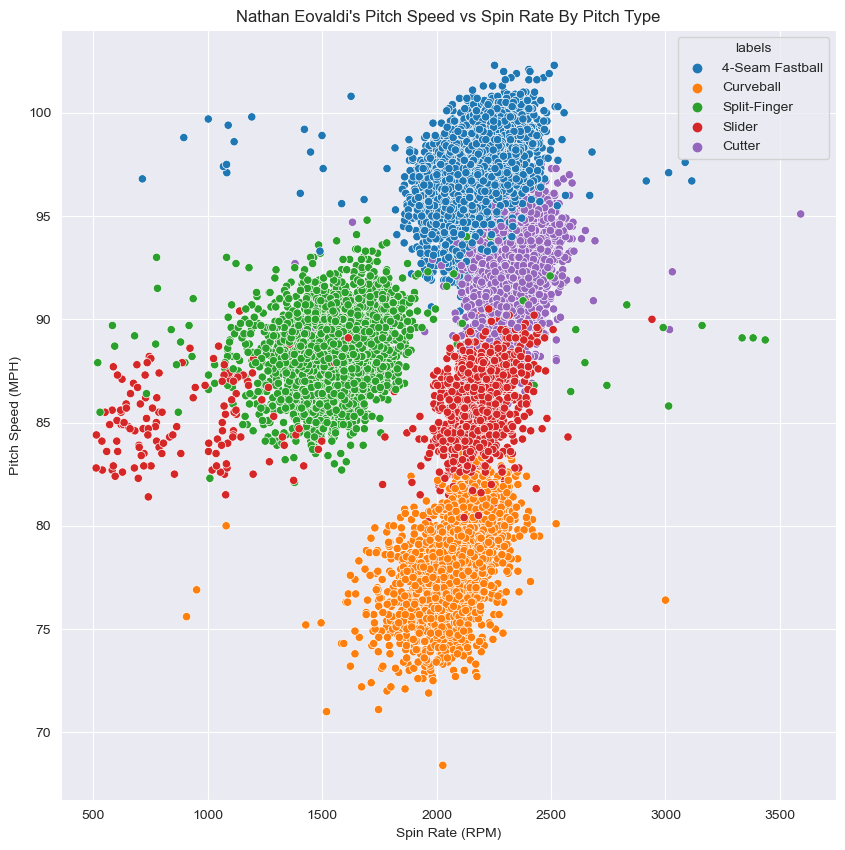

In [19]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_combined, x='release_spin_rate', y='release_speed', hue='labels')
plt.xlabel('Spin Rate (RPM)')
plt.ylabel('Pitch Speed (MPH)')
plt.title("Nathan Eovaldi's Pitch Speed vs Spin Rate By Pitch Type")

## Test the models on the test data set from the astros game on the 14th of april

In [11]:
test_data_no_label = pd.read_csv('analyzing_baseball_data_w_r/datasets/test_data_eo.csv')
test_data_label = pd.read_csv('analyzing_baseball_data_w_r/datasets/test_data_eo_labels.csv')


test_data_combined = test_data_no_label.copy()

test_data_combined['labels'] = test_data_label['pitch_name']

print(test_data_combined.head(10))

   release_spin_rate  release_speed           labels
0               2118           96.0  4-Seam Fastball
1               1687           90.8     Split-Finger
2               1783           90.3     Split-Finger
3               1826           78.2        Curveball
4               1938           77.0        Curveball
5               2156           94.2  4-Seam Fastball
6               2292           92.3           Cutter
7               1936           76.1        Curveball
8               1957           76.2        Curveball
9               2024           77.7        Curveball


In [15]:

test_rf_pred = rf.predict(test_data_no_label)
accuracy_rf_test = accuracy_score(test_data_label, test_rf_pred)


print(f'Accuracy of Random Forest on 04/14/2024 Pitch Classification: {accuracy_rf_test}')

Accuracy of Random Forest on 04/14/2024 Pitch Classification: 0.9885057471264368


In [18]:
test_svm_pred = svm_model.predict(test_data_no_label)
accuracy_rf_test = accuracy_score(test_data_label, test_svm_pred)


print(f'Accuracy of SVM on 04/14/2024 Pitch Classification: {accuracy_rf_test}')

Accuracy of SVM on 04/14/2024 Pitch Classification: 0.9885057471264368
